In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('./data/adult.data', header=None, na_values=' ?')
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Display first few rows of the dataset
print(data.head())


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [3]:
# Encode categorical features using LabelEncoder and OneHotEncoder
categorical_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

for feature in categorical_features:
    data[feature] = LabelEncoder().fit_transform(data[feature].astype(str))

# Display first few rows of the encoded dataset
print(data.head())


   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          6   77516          9             13               4   
1   50          5   83311          9             13               2   
2   38          3  215646         11              9               0   
3   53          3  234721          1              7               2   
4   28          3  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours-per-week  native-country  income  
0              40              38   <=50K  
1              13              38   <=50K  
2              40   

In [4]:
# Handle missing data using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Ensure no missing values remain
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [5]:
# Split the data into features and target
X = data.drop("income", axis=1)
y = data["income"].apply(lambda x: 1 if x == " >50K" else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (26048, 14)
Testing set size: (6513, 14)


In [6]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

# Evaluate models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Cross-Validation Accuracy: {cv_scores.mean():.4f}")

    # Fit the model and evaluate on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Test Accuracy: {accuracy:.4f}")

    # Calculate AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{name} - AUC: {auc:.4f}")


/Users/henry/miniconda3/envs/578/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/henry/miniconda3/envs/578/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Logistic Regression - Cross-Validation Accuracy: 0.8092


/Users/henry/miniconda3/envs/578/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Test Accuracy: 0.8124
Logistic Regression - AUC: 0.8217
Decision Tree - Cross-Validation Accuracy: 0.8089
Decision Tree - Test Accuracy: 0.8174
Decision Tree - AUC: 0.7568
Random Forest - Cross-Validation Accuracy: 0.8558
Random Forest - Test Accuracy: 0.8601
Random Forest - AUC: 0.9103
SVM - Cross-Validation Accuracy: 0.7934
SVM - Test Accuracy: 0.7958
SVM - AUC: 0.6486


Feature ranking:
1. feature 2 (0.1679) - fnlwgt
2. feature 0 (0.1458) - age
3. feature 10 (0.1164) - capital-gain
4. feature 7 (0.0972) - relationship
5. feature 4 (0.0944) - education-num
6. feature 12 (0.0824) - hours-per-week
7. feature 5 (0.0758) - marital-status
8. feature 6 (0.0663) - occupation
9. feature 1 (0.0408) - workclass
10. feature 11 (0.0368) - capital-loss
11. feature 3 (0.0299) - education
12. feature 13 (0.0185) - native-country
13. feature 8 (0.0140) - race
14. feature 9 (0.0139) - sex


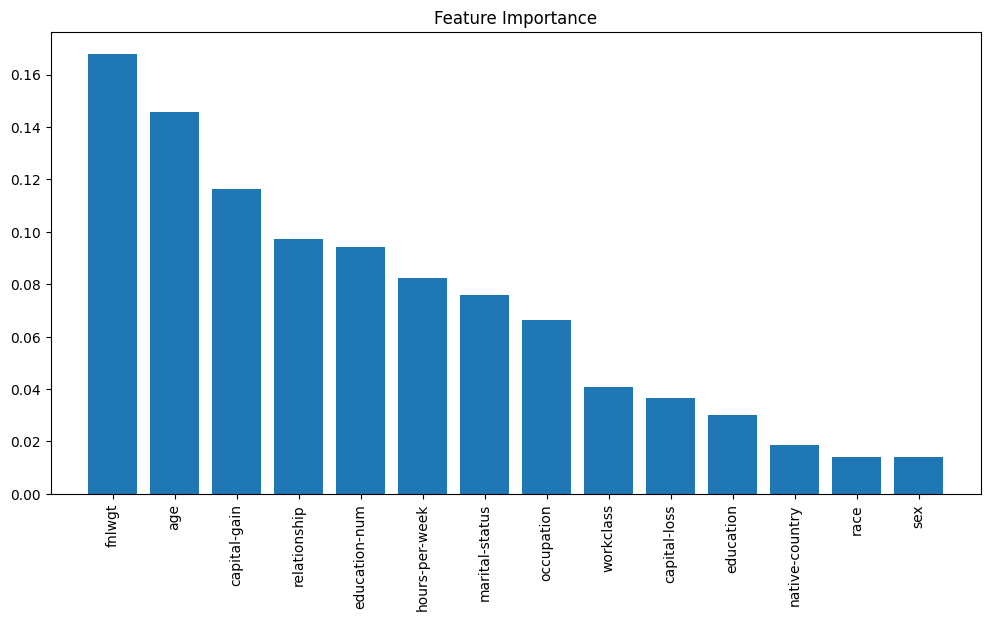

In [7]:
# Extract feature importance from Random Forest
rf = models["Random Forest"]
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature importance
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]:.4f}) - {X.columns[indices[f]]}")

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
